## Code to create a bland-altman plot for a csv data frame

### Load the dataframe and apply inclusion criteria

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.agreement import mean_diff_plot
from pingouin import intraclass_corr
# Load CSV
file_path = r"Path/to/your/feasibility_database.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Filter the DataFrame based on the conditions
df_incl = df[
    (df["exclusion_rhythm"] == 0) &
    (df["Incl_wear_time_week0"] == 1) &
    (df["Incl_hq_time0"] == 1) &
    (df["Incl_wear_time_week1"] == 1) &
    (df["Incl_hq_time1"] == 1) &
    (df["training_set"] == 0)
]

df_incl.shape

(444, 83)

### Extract relevant parameters and plot Bland-Altman

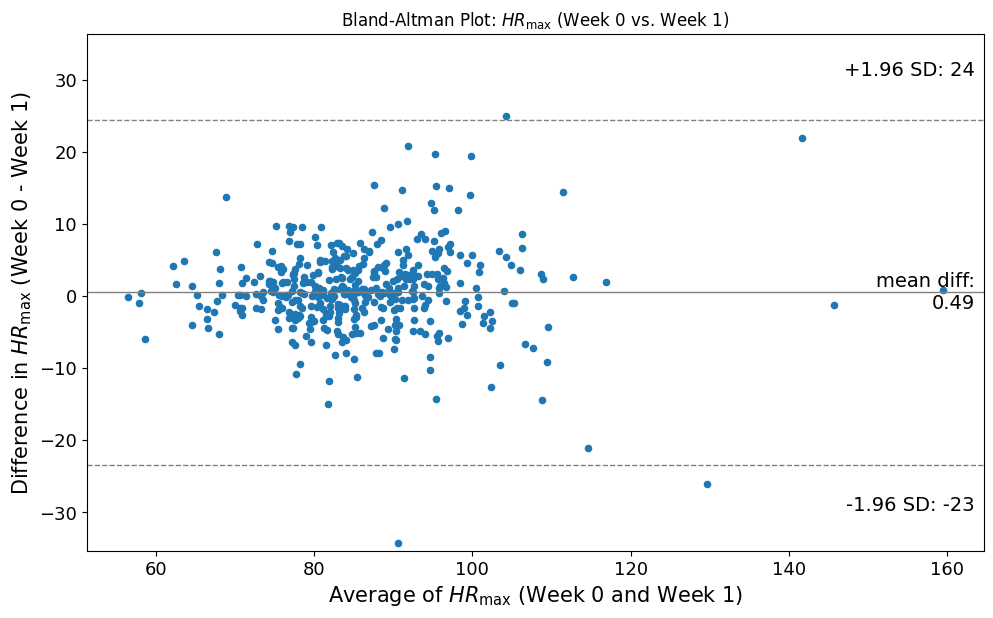

In [13]:
# Extract the relevant parameters for Bland-Altman
rel_param_week0 = "HR_max_day_week0"
rel_param_week1 = "HR_max_day_week1"
week0 = df_incl[rel_param_week0]
week1 = df_incl[rel_param_week1]

# Create Bland-Altman plot
fig, ax = plt.subplots(figsize=(10, 6))
mean_diff_plot(week0, week1, ax=ax)

# Customize the plot
ax.set_title("Bland-Altman Plot: $HR_{\mathrm{max}}$ (Week 0 vs. Week 1)")
ax.set_xlabel("Average of $HR_{\mathrm{max}}$ (Week 0 and Week 1)")
ax.set_ylabel("Difference in $HR_{\mathrm{max}}$ (Week 0 - Week 1)")

# Save the plot at high resolution
output_path = r"C:\Users\z863160\Documents\AI4P\PPG\Artikel feasibility\figs\final results 2.0\test-retest reliability\bland_altman_max_hr.png"  # Replace with your desired file name
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

### Bland-Altman as a function

In [3]:
# Define a function for Bland-Altman plot creation
def calculate_icc(week0, week1):
    """
    Calculate the Intraclass Correlation Coefficient (ICC).
    """
    data = {
        "Subject": range(len(week0)),
        "Rater1": week0,
        "Rater2": week1,
    }
    df = pd.DataFrame(data).melt(id_vars="Subject", var_name="Rater", value_name="Score")
    icc_result = intraclass_corr(data=df, targets="Subject", raters="Rater", ratings="Score")
    icc_value = icc_result.loc[icc_result["Type"] == "ICC3k", "ICC"].values[0]
    return icc_value

def create_bland_altman_plot(data, param_week0, param_week1, title, xlabel, ylabel, output_path):
    week0 = data[param_week0]
    week1 = data[param_week1]

    # Calculate ICC
    icc_value = calculate_icc(week0, week1)

    # Create Bland-Altman plot
    fig, ax = plt.subplots(figsize=(10, 6))
    mean_diff_plot(week0, week1, ax=ax)

    # Customize the plot
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    icc_text = f"ICC: {icc_value:.2f}"
    ax.text(0.05, 0.95, icc_text, transform=ax.transAxes, fontsize=14, verticalalignment='top')

    # Save the plot
    plt.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.show()

### Create BA plots for three HR parameters

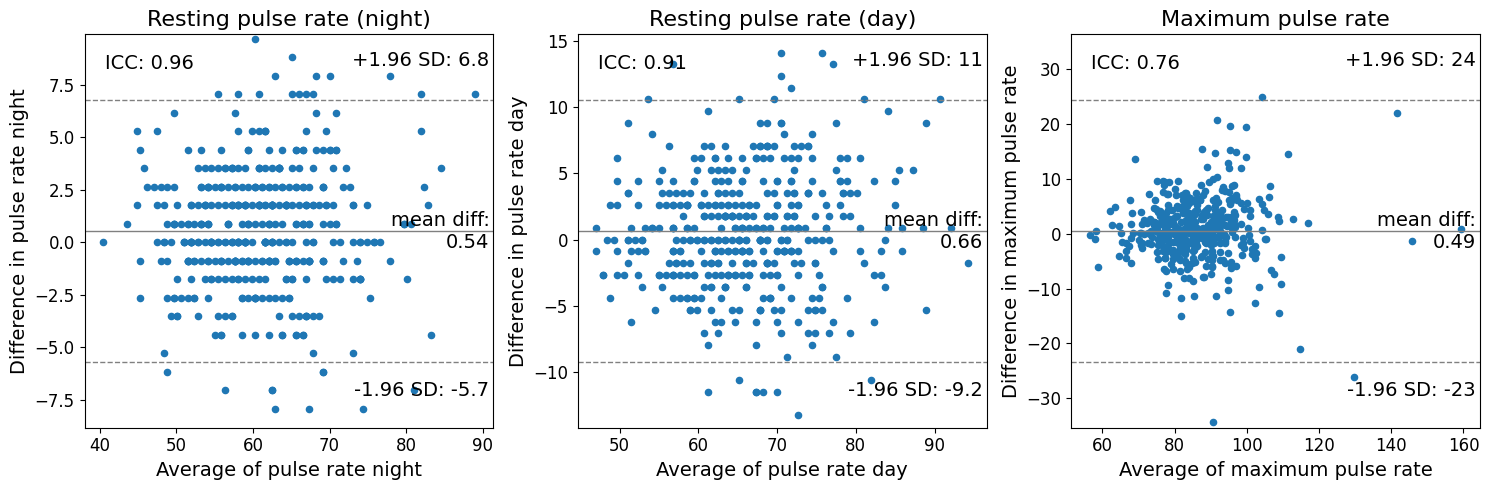

In [11]:
def create_bland_altman_plot(data, param_week0, param_week1, title, xlabel, ylabel, ax):
    week0 = data[param_week0]
    week1 = data[param_week1]

    # Calculate ICC
    icc_value = calculate_icc(week0, week1)

    # Create Bland-Altman plot
    mean_diff_plot(week0, week1, ax=ax)

    # Customize the plot
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    icc_text = f"ICC: {icc_value:.2f}"
    ax.text(0.05, 0.95, icc_text, transform=ax.transAxes, fontsize=14, verticalalignment='top')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Resting Heart Rate during the Night
create_bland_altman_plot(
    data=df_incl,
    param_week0="HR_rest_night_week0",
    param_week1="HR_rest_night_week1",
    title="Resting pulse rate (night)",
    xlabel="Average of pulse rate night",
    ylabel="Difference in pulse rate night",
    ax=axes[0]
)
# Resting Heart Rate during the Day
create_bland_altman_plot(
    data=df_incl,
    param_week0="HR_rest_day_week0",
    param_week1="HR_rest_day_week1",
    title="Resting pulse rate (day)",
    xlabel="Average of pulse rate day",
    ylabel="Difference in pulse rate day",
    ax=axes[1]
)

# Maximum Heart Rate during the Day
create_bland_altman_plot(
    data=df_incl,
    param_week0="HR_max_day_week0",
    param_week1="HR_max_day_week1",
    title="Maximum pulse rate",
    xlabel="Average of maximum pulse rate",
    ylabel="Difference in maximum pulse rate",
    ax=axes[2]
)


plt.tight_layout()
output_path = r"C:\Users\z863160\Documents\AI4P\PPG\Artikel feasibility\figs\final results 2.0\test-retest reliability\bland_altman_grouped.png"  # Replace with your desired file name
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

